In [32]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

df = pd.read_csv('COVID19-Cases-Global.csv')

# Clean data
df.fillna(0, inplace=True)

df.head()

,country,date,total_cases,daily_new_cases,total_deaths,daily_new_deaths
0,Afghanistan,2020-01-23,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-24,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-25,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-26,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-27,0.0,0.0,0.0,0.0


In [33]:
# Last two digits of student number: 63
# Afghanistan with index 0 is the first country
# Therefore country at index 62 (63-1) is the 63rd country
# 63rd country is Georgia

countries = df['country'].unique()
countries_df = pd.DataFrame(countries, columns=['Country'])
countries_df.iloc[60:65]

,Country
60,Gabon
61,Gambia
62,Georgia
63,Germany
64,Ghana


In [39]:
# Extract data from assigned country
georgia_data = df[df['country'] == 'Georgia']
georgia_data.head()

,country,date,total_cases,daily_new_cases,total_deaths,daily_new_deaths
19779,Georgia,2020-01-23,0.0,0.0,0.0,0.0
19780,Georgia,2020-01-24,0.0,0.0,0.0,0.0
19781,Georgia,2020-01-25,0.0,0.0,0.0,0.0
19782,Georgia,2020-01-26,0.0,0.0,0.0,0.0
19783,Georgia,2020-01-27,0.0,0.0,0.0,0.0


In [49]:
# 2. Moving Average 7 day plot with LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Compute the 7-day moving average of daily new cases
georgia_data['7-day_moving_average'] = georgia_data['daily_new_cases'].rolling(window=7).mean()

# Remove rows with missing values
georgia_data = georgia_data.dropna()

# Set up the features and target variables for the regression
X = np.array(georgia_data.index).reshape(-1, 1)
y = np.array(georgia_data['7-day_moving_average'])

In [53]:
# 3. Split the data into training and test sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [55]:
# Fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Make predictions with the model
y_pred = poly_reg.predict(X_poly_test)

# 4. Evaluate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 2296.7713364598


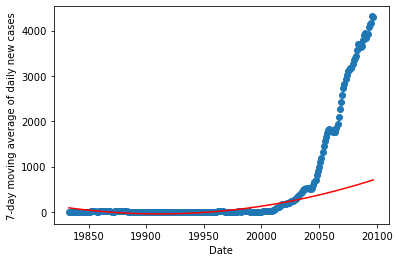

In [56]:
# 5. Plot the original data and the regression line
plt.scatter(X, y)
plt.plot(X, poly_reg.predict(poly.transform(X)), color='red')
plt.xlabel('Date')
plt.ylabel('7-day moving average of daily new cases')
plt.show()

#### 6. Explain the results

An RMSE (Root Mean Squared Error) of 2296.7713 indicates the average difference between the predicted values and the actual values of the 7-day moving average of daily new cases is around 2296.7713.

###### Describe how you made the program:
I used Python and the pandas, numpy, scikit-learn, and matplotlib libraries to perform a regression analysis on a dataset of COVID-19 cases in Georgia (63rd countr).

First, the program reads the dataset from a CSV file and filters it to include only data for Georgia. Then, it computes the 7-day moving average of daily new cases and removes any rows with missing values.

Next, the program sets up the features and target variables for the regression and fits a polynomial regression model to the data. It makes predictions with the model and plots the original data and the regression line using matplotlib.

Finally, the program evaluates the regression model using the root mean squared error (RMSE) metric, which measures the difference between the predicted and actual values of the target variable. The RMSE value of 2296.771 indicates that the model has a relatively high error rate and could potentially be improved with additional features or a different model type.